In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
# Load Data

def load_filtered_dfs(data_path, filter_label):
    """
    Loads CSV files from a directory structure and filters them based on labels.
        
    Returns:
    - List of DataFrames that match the filter criteria.
    """
    col_names = [
        'tachometer', 'underhang_axial', 'underhang_radiale', 'underhang_tangential',
        'overhang_axial', 'overhang_radiale', 'overhang_tangential', 'microphone'
    ]

    filtered_dfs = []
    
    for dirname, _, filenames in os.walk(data_path):
        # Ensure filenames are sorted numerically
        filenames = sorted(filenames, key=lambda f: float(f.replace('.csv', '')))
        
        for filename in filenames:
            file_addr = os.path.join(dirname, filename)
            
            if file_addr.endswith('.csv'):
                # Extract label from folder structure
                label = "-".join(file_addr.split('.csv')[0].split("/")[-3:-1])
                
                # Check if any of the filter labels are in the extracted label
                if filter_label in label:
                    print(f"Loading: {file_addr}")
                    df = pd.read_csv(file_addr, names=col_names)
                    filtered_dfs.append(df)
    
    return filtered_dfs

data_path = "../data"
filter_label = "normal"

normal_dfs = load_filtered_dfs(data_path, filter_label)

normal_df = pd.concat(normal_dfs, ignore_index=True)

Loading: ../data/normal/normal/12.288.csv
Loading: ../data/normal/normal/13.1072.csv
Loading: ../data/normal/normal/14.336.csv
Loading: ../data/normal/normal/15.1552.csv
Loading: ../data/normal/normal/16.1792.csv
Loading: ../data/normal/normal/17.2032.csv
Loading: ../data/normal/normal/18.432.csv
Loading: ../data/normal/normal/19.6608.csv
Loading: ../data/normal/normal/20.2752.csv
Loading: ../data/normal/normal/21.7088.csv
Loading: ../data/normal/normal/22.3232.csv
Loading: ../data/normal/normal/23.552.csv
Loading: ../data/normal/normal/24.576.csv
Loading: ../data/normal/normal/25.6.csv
Loading: ../data/normal/normal/26.624.csv
Loading: ../data/normal/normal/27.4432.csv
Loading: ../data/normal/normal/28.8768.csv
Loading: ../data/normal/normal/29.4912.csv
Loading: ../data/normal/normal/30.72.csv
Loading: ../data/normal/normal/31.744.csv
Loading: ../data/normal/normal/32.9728.csv
Loading: ../data/normal/normal/33.5872.csv
Loading: ../data/normal/normal/34.2016.csv
Loading: ../data/normal

In [3]:
normal_df.describe()

,tachometer,underhang_axial,underhang_radiale,underhang_tangential,overhang_axial,overhang_radiale,overhang_tangential,microphone
count,1.225000e+07,1.225000e+07,1.225000e+07,1.225000e+07,1.225000e+07,1.225000e+07,1.225000e+07,1.225000e+07
mean,1.565263e-04,7.892067e-03,-4.660431e-04,3.732063e-04,1.483657e-02,3.021278e-03,1.877392e-02,1.227750e-02
std,1.711226e+00,8.536628e-01,4.174455e-01,1.837692e-01,6.248925e-01,3.479750e-02,4.133592e-01,1.755920e-01
min,-1.558800e+00,-4.483500e+00,-3.417000e+00,-2.171700e+00,-2.956600e+00,-3.733500e-01,-2.865800e+00,-3.369100e+00
25%,-7.135100e-01,-5.590000e-01,-2.866900e-01,-8.650100e-02,-3.302000e-01,-2.157700e-02,-2.295400e-01,-1.245400e-01
50%,-6.491500e-01,7.351000e-02,1.331900e-02,8.434800e-04,2.170600e-02,4.061300e-03,1.297300e-02,-6.496600e-03
75%,-5.384100e-01,6.521300e-01,2.979900e-01,8.529200e-02,3.465300e-01,2.810800e-02,2.617800e-01,1.332000e-01
max,5.107800e+00,2.367200e+00,4.099800e+00,1.933000e+00,3.508700e+00,2.812800e-01,2.836000e+00,8.529000e-01


In [4]:
# Downsampling feature engineering
def downSampler(data, b):
    """
    Downsamples the given DataFrame by averaging every 'b' rows.

    Parameters:
    - data (pd.DataFrame): Input time-series data.
    - b (int): Sampling rate (number of rows to aggregate).

    Returns:
    - pd.DataFrame: Downsampled data.
    """
    return data.groupby(data.index // b).mean().reset_index(drop=True)

normal_df = downSampler(normal_df,2500)
print(normal_df.shape)

(4900, 8)


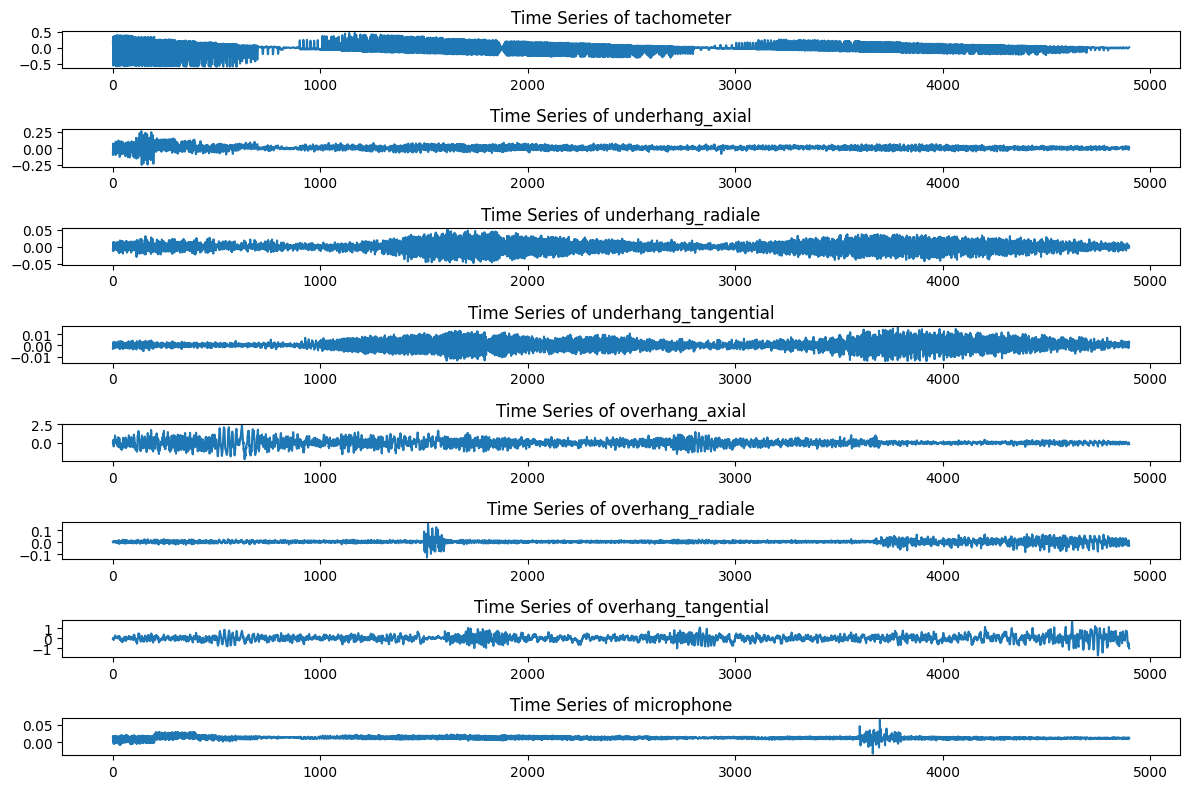

In [5]:
import matplotlib.pyplot as plt

# Plot
def plot_timeseries(df, columns):
    """
    Plots selected time-series columns from a DataFrame over n_samples.
    """
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(columns, 1):
        plt.subplot(len(columns), 1, i)
        plt.plot(df[col].values)
        plt.title(f"Time Series of {col}")
        plt.tight_layout()
    plt.show()

plot_timeseries(normal_df, columns=normal_df.columns)

In [6]:
data_path = "../data"
filter_label = "imbalance-6g"

imbalance_dfs = load_filtered_dfs(data_path, filter_label)

imbalance_df = pd.concat(imbalance_dfs, ignore_index=True)

Loading: ../data/imbalance/imbalance/6g/13.9264.csv
Loading: ../data/imbalance/imbalance/6g/14.336.csv
Loading: ../data/imbalance/imbalance/6g/15.36.csv
Loading: ../data/imbalance/imbalance/6g/16.1792.csv
Loading: ../data/imbalance/imbalance/6g/17.408.csv
Loading: ../data/imbalance/imbalance/6g/18.432.csv
Loading: ../data/imbalance/imbalance/6g/19.6608.csv
Loading: ../data/imbalance/imbalance/6g/20.2752.csv
Loading: ../data/imbalance/imbalance/6g/21.7088.csv
Loading: ../data/imbalance/imbalance/6g/22.7328.csv
Loading: ../data/imbalance/imbalance/6g/23.552.csv
Loading: ../data/imbalance/imbalance/6g/24.576.csv
Loading: ../data/imbalance/imbalance/6g/25.3952.csv
Loading: ../data/imbalance/imbalance/6g/26.8288.csv
Loading: ../data/imbalance/imbalance/6g/27.648.csv
Loading: ../data/imbalance/imbalance/6g/28.8768.csv
Loading: ../data/imbalance/imbalance/6g/29.4912.csv
Loading: ../data/imbalance/imbalance/6g/30.5152.csv
Loading: ../data/imbalance/imbalance/6g/31.5392.csv
Loading: ../data/imb

In [7]:
imbalance_df.describe()

,tachometer,underhang_axial,underhang_radiale,underhang_tangential,overhang_axial,overhang_radiale,overhang_tangential,microphone
count,1.225000e+07,1.225000e+07,1.225000e+07,1.225000e+07,1.225000e+07,1.225000e+07,1.225000e+07,1.225000e+07
mean,-1.712867e-06,3.055806e-03,2.694678e-04,9.066296e-04,7.706909e-03,3.113166e-03,4.595731e-02,1.402789e-02
std,1.723980e+00,8.341692e-01,5.183670e-01,2.193339e-01,1.063280e-01,3.006839e-02,7.105123e-01,1.809850e-01
min,-1.548600e+00,-4.508500e+00,-3.710500e+00,-2.390600e+00,-7.665000e-01,-1.563800e-01,-5.026500e+00,-4.824000e-01
25%,-7.294600e-01,-5.393200e-01,-3.292700e-01,-1.056400e-01,-5.231200e-02,-1.847100e-02,-3.835600e-01,-1.289900e-01
50%,-6.578300e-01,6.408900e-02,4.550700e-03,-3.003800e-03,1.464100e-02,3.695500e-03,4.084400e-02,-5.352700e-03
75%,-5.484000e-01,6.245200e-01,3.209000e-01,9.373800e-02,7.487700e-02,2.539900e-02,4.687900e-01,1.399700e-01
max,5.113000e+00,2.409900e+00,5.384100e+00,2.713400e+00,5.508300e-01,1.392800e-01,4.442600e+00,8.686900e-01


In [8]:
imbalance_df = downSampler(imbalance_df,2500)
print(imbalance_df.shape)

(4900, 8)


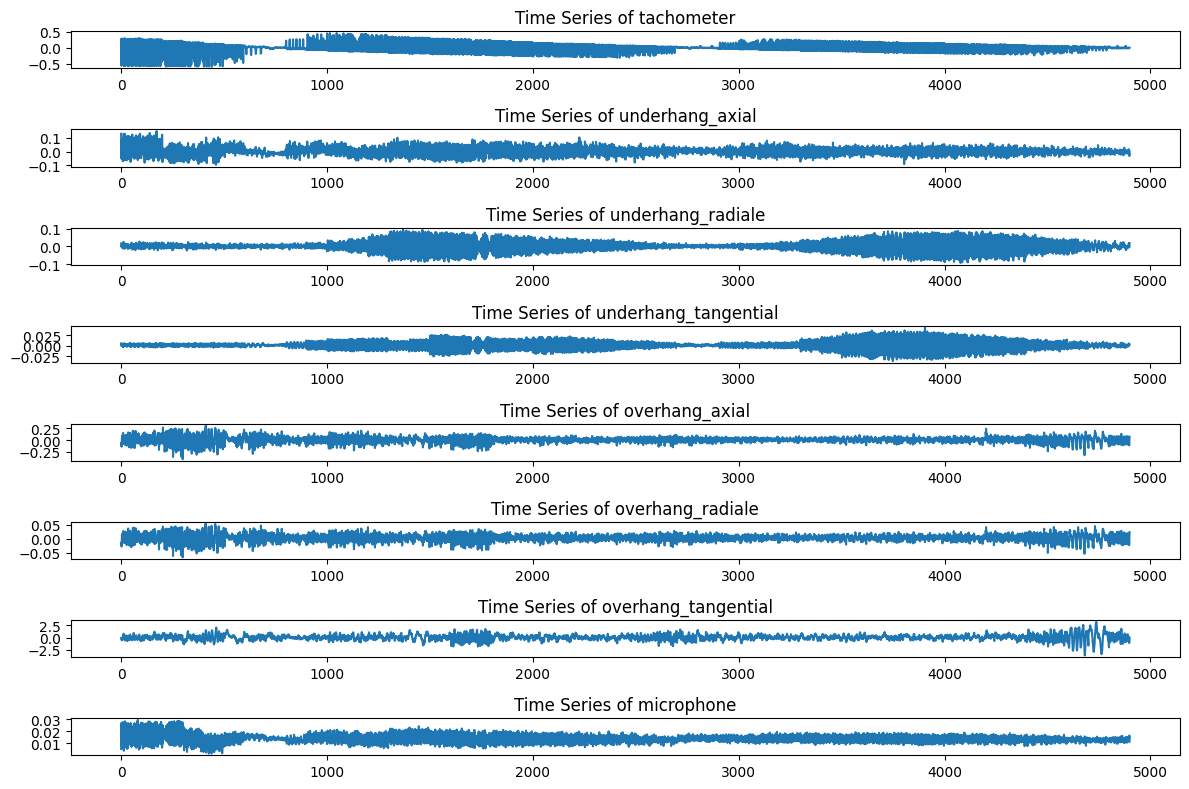

In [9]:
plot_timeseries(imbalance_df, columns=imbalance_df.columns)

In [10]:
def rolling_mean_data(df, window_size=100, columns=None):
    """
    Applies a rolling mean transformation to specified columns of a DataFrame.
    
    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - window_size (int): Size of the rolling window.
    - columns (list or None): List of columns to apply the rolling mean. If None, applies to all numeric columns.
    
    Returns:
    - pd.DataFrame: Transformed DataFrame with rolling mean applied.
    """
    if columns is None:
        # Select all numeric columns, including 'time' if present
        columns = df.select_dtypes(include=[np.number]).columns  

    df_copy = df.copy()
    df_copy[columns] = df_copy[columns].rolling(window=window_size, min_periods=1).mean()
    
    return df_copy

normal_df = rolling_mean_data(normal_df)
imbalance_df = rolling_mean_data(imbalance_df)

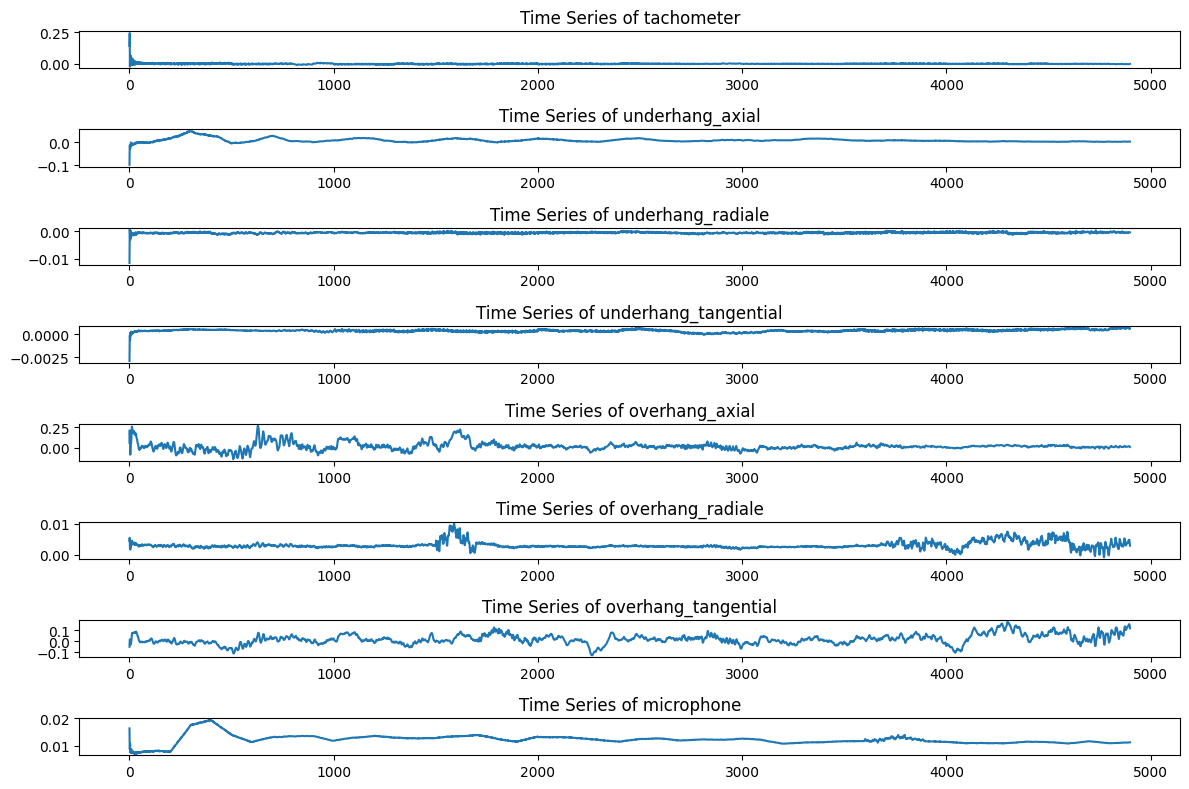

In [11]:
plot_timeseries(normal_df, columns=normal_df.columns)

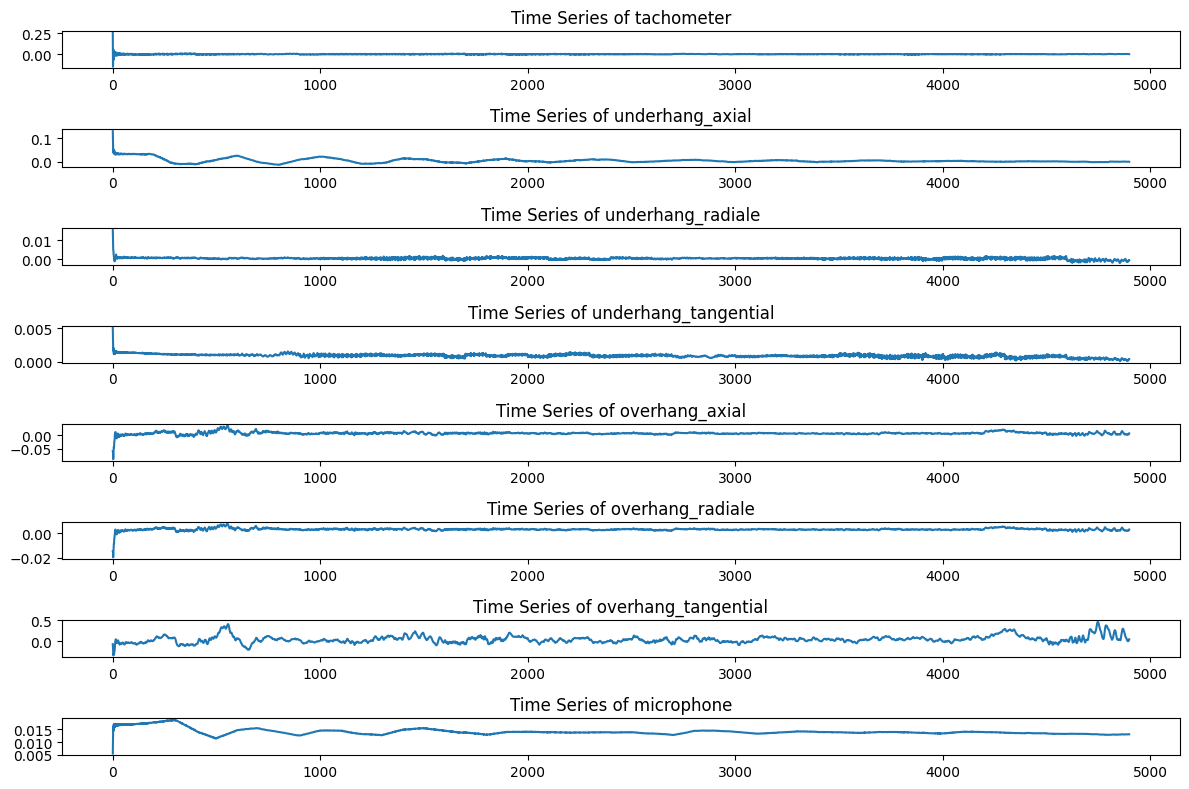

In [12]:
plot_timeseries(imbalance_df, columns=normal_df.columns)

In [13]:
def concatenate_with_labels(df1, label1, df2, label2):
    """
    Concatenates two DataFrames and adds a 'label' column to each for visualization.
    
    Parameters:
    - df1 (pd.DataFrame): First DataFrame
    - label1 (str): Label for the first DataFrame
    - df2 (pd.DataFrame): Second DataFrame
    - label2 (str): Label for the second DataFrame
    
    Returns:
    - pd.DataFrame: Concatenated DataFrame with labels
    """
    df1_copy = df1.copy()
    df2_copy = df2.copy()

    # Add label columns
    df1_copy['label'] = label1
    df2_copy['label'] = label2

    # Concatenate DataFrames
    combined_df = pd.concat([df1_copy, df2_copy], ignore_index=True)
    
    return combined_df

all_data = concatenate_with_labels(normal_df, "normal", imbalance_df, "imbalance")

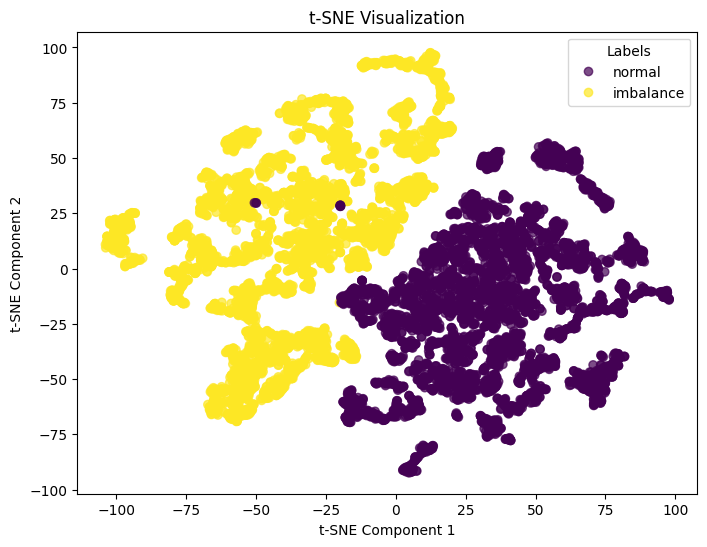

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

def plot_tsne(df, label_column='label'):
    """
    Applies t-SNE to a DataFrame and visualizes it with color-coded labels.
    
    Parameters:
    - df (pd.DataFrame): Input DataFrame with a 'label' column
    - label_column (str): Name of the column containing labels
    
    Returns:
    - None (Displays a t-SNE plot)
    """
    # Select only numeric features for t-SNE
    features = df.select_dtypes(include=[np.number]).drop(columns=[label_column], errors='ignore')
    
    # Standardize data for better t-SNE performance
    features_scaled = StandardScaler().fit_transform(features)

    # Apply t-SNE
    tsne = TSNE(n_components=2, perplexity=30, random_state=42)
    tsne_results = tsne.fit_transform(features_scaled)

    # Create scatter plot
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=df[label_column].astype('category').cat.codes, cmap="viridis", alpha=0.7)
    
    # Add legend
    handles, _ = scatter.legend_elements()
    plt.legend(handles, df[label_column].unique(), title="Labels")
    
    plt.title("t-SNE Visualization")
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.show()

# Run t-SNE plot
plot_tsne(all_data)

In [ ]:
## Compromise between data smoothing and loss of high frequency features

- We can utilize downsampling for smooth our time series data and prepare our data to focus on bigger picture of the data.
- This is a feature engineering practice to transform our data
